<a href="https://colab.research.google.com/github/RaviralaLathasri/ML-Models/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
#KNN
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
from matplotlib.colors import ListedColormap
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings('ignore')

In [18]:
dataset = pd.read_csv("/content/Logistic_Iris.csv")
x = dataset.iloc[:, [0,1,2, 3]].values
print(x)
y = dataset.iloc[:, 4].values
print(y)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.1 1.5 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [19]:
 xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.25, random_state=0)
 sc = StandardScaler()
 xtrain = sc.fit_transform(xtrain)
 xtest = sc.transform(xtest)

In [20]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(xtrain, ytrain)

KNeighborsClassifier(n_neighbors=7)

In [21]:
pred = knn.predict(xtest)
accuracy = accuracy_score(ytest, pred) * 100

In [22]:
cm =confusion_matrix(ytest, pred)
print(cm)

[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]


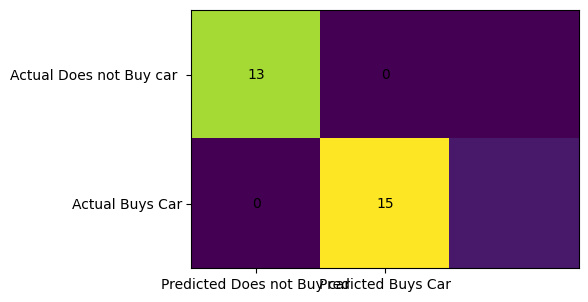

In [23]:
cm =confusion_matrix(ytest, pred)
fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted Does not Buy car', 'Predicted Buys Car'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual Does not Buy car ', 'Actual Buys Car'))
ax.set_ylim(1.5,-0.5)
for i in range(2):
 for j in range(2):
    ax.text(j, i, cm[i, j], ha='center', va='center', color='black')
plt.show()

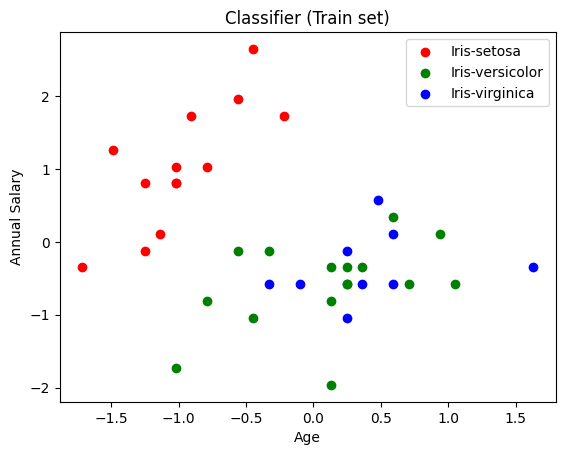

In [24]:
X_set = xtest
y_set = ytest
for i, j in enumerate(np.unique(y_set)):
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c=ListedColormap(('red', 'green', 'blue'))(i), label=j)
plt.title('Classifier (Train set)')
plt.xlabel('Age')
plt.ylabel('Annual Salary')
plt.legend()
plt.show()

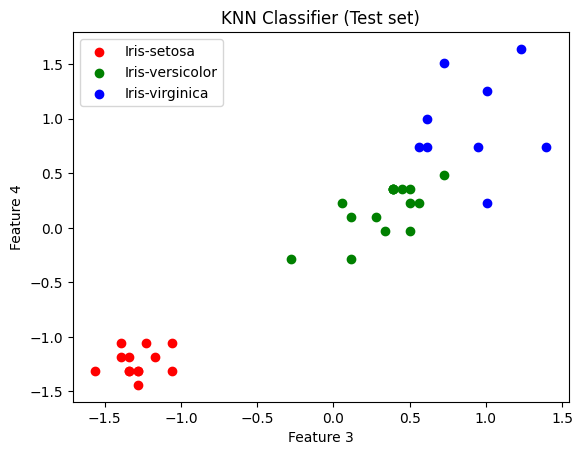

In [26]:
# Plot using Feature 3 and Feature 4
X_set = xtest
y_set = ytest

for i, j in enumerate(np.unique(y_set)):
    color = ListedColormap(('red', 'green', 'blue'))(i)
    plt.scatter(X_set[y_set == j, 2], X_set[y_set == j, 3], color=color, label=j)

plt.title('KNN Classifier (Test set)')
plt.xlabel('Feature 3')
plt.ylabel('Feature 4')
plt.legend()
plt.show()  # ✅ Correct function call


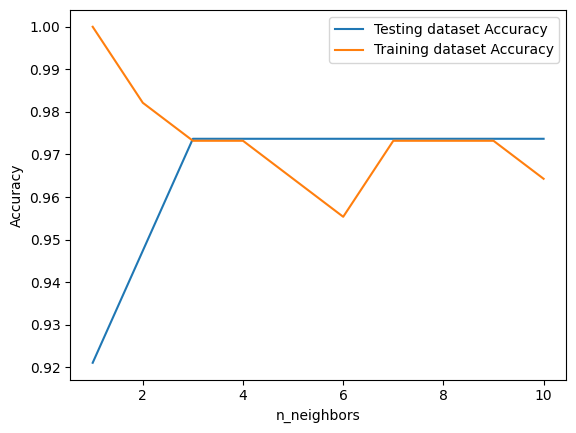

In [28]:
neighbours=np.arange(1,11)
train_accuracy=np.empty(len(neighbours))
test_accuracy=np.empty(len(neighbours))
for i,k in enumerate(neighbours):
  knn=KNeighborsClassifier(n_neighbors=k)
  knn.fit(xtrain,ytrain)
  train_accuracy[i]=knn.score(xtrain,ytrain)
  test_accuracy[i]=knn.score(xtest,ytest)
#Generate plot
plt.plot(neighbours,test_accuracy,label='Testing dataset Accuracy')
plt.plot(neighbours,train_accuracy,label='Training dataset Accuracy')
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()